In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

# Data visualization

There are multiple options of plotting data in Python.

[Matplotlib](https://matplotlib.org) is one of the most widely used and allows you to customize nearly every aspect of your plots. A downside is that the default settings don't look the best.

There are more options, but I'll let you explore them on your own.

# Install [Matplotlib](https://matplotlib.org)

In a cmd shell or terminal run:
```console
conda activate neu365p
pip install matplotlib
```

### Let's check out some [Matplotlib example plot types](https://matplotlib.org/stable/plot_types/index.html)

I expect that you will be able to use the *online documentation* and *google* to **figure out how to make whatever plots you want**.

Here I provide you with a **quick start** tutotial to get you going.

# A **Quick Start** guide for **basic plots** in Matplotlib

**Learning goals**
- You will be able to plot 2-D data.
- You will be able to style your plots.
- You will be able to display grids of plot.

### Let's consider a 3-D array of EEG *time series* for multiple *channels, trials*

<img src="images/EEGs-3d.png">

<img src="images/EEGs-channels-trials.png" width="50%">

In [2]:
# Load EEG data from file

import numpy as np

# See np.load & np.save
# Filepath is relative to this notebook
EEGs = np.load("data/EEGs.npy")

EEGs.shape

(64, 640, 99)

In [3]:
print(f"# channels = {EEGs.shape[0]}")
print(f"# time pts = {EEGs.shape[1]}")
print(f"# trials   = {EEGs.shape[2]}")

# channels = 64
# time pts = 640
# trials   = 99


<img src="images/EEGs-channel1-trial2.png" width="50%">

In [4]:
# data = channel 1, trial 2

data = EEGs[1,:,2]

data.shape

(640,)

Let's plot this EEG.

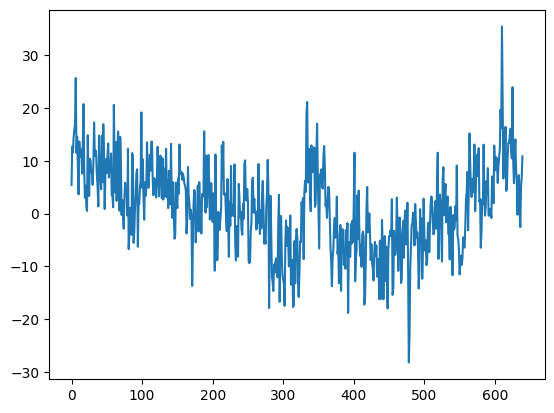

In [5]:
import matplotlib.pyplot as plt

plt.plot(data)

Add `;` to the end of the last line to suppress the text output.

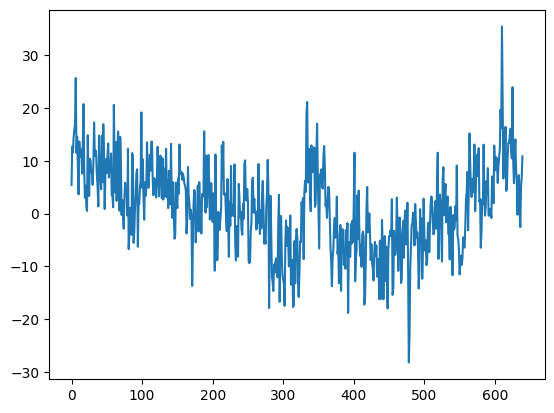

In [6]:
plt.plot(data);

If you have a **retina display** (e.g., MacOS) this will make your plots look nicer.

In [7]:
%config InlineBackend.figure_format = 'retina'

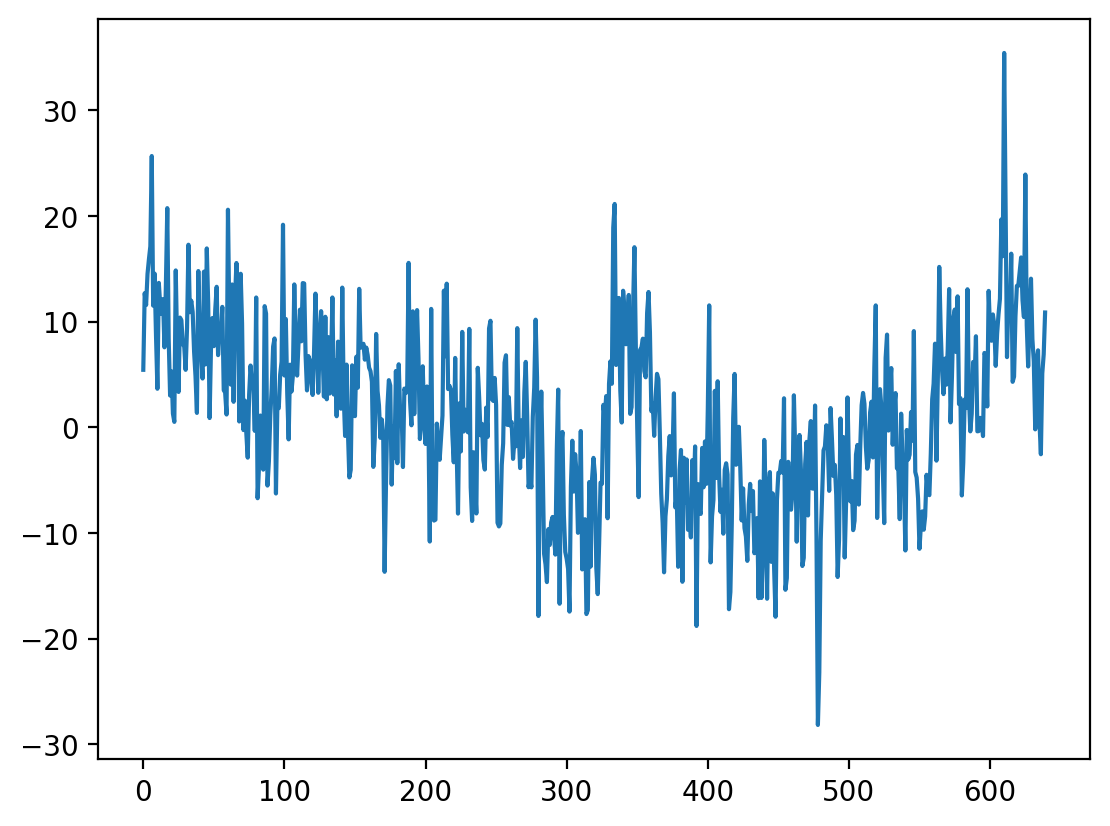

In [8]:
plt.plot(data);

The default Matplotlib plot style is still not great. You can of course tweak all of the settings to get it just how you like it, but there are some preset styles you can load that are at least ok looking.

In [9]:
plt.style.use("bmh")

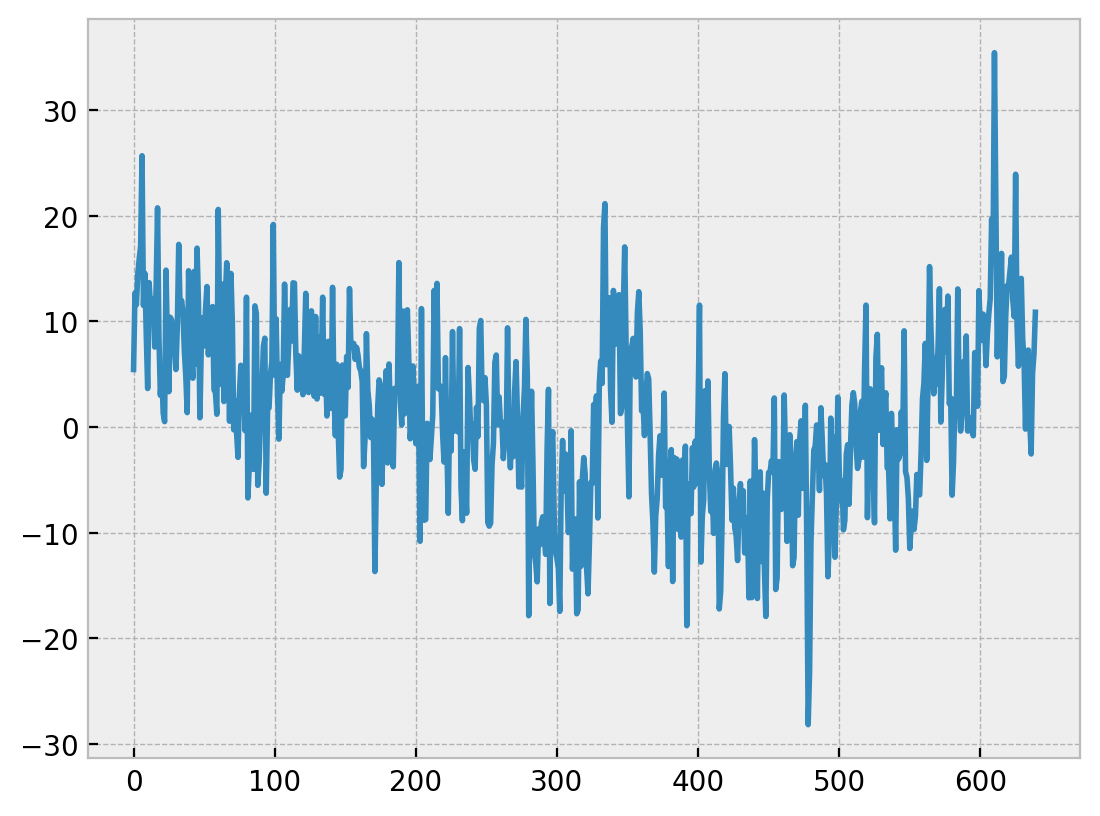

In [10]:
plt.plot(data);

Specify line width using `lw=` and line color using `c=`

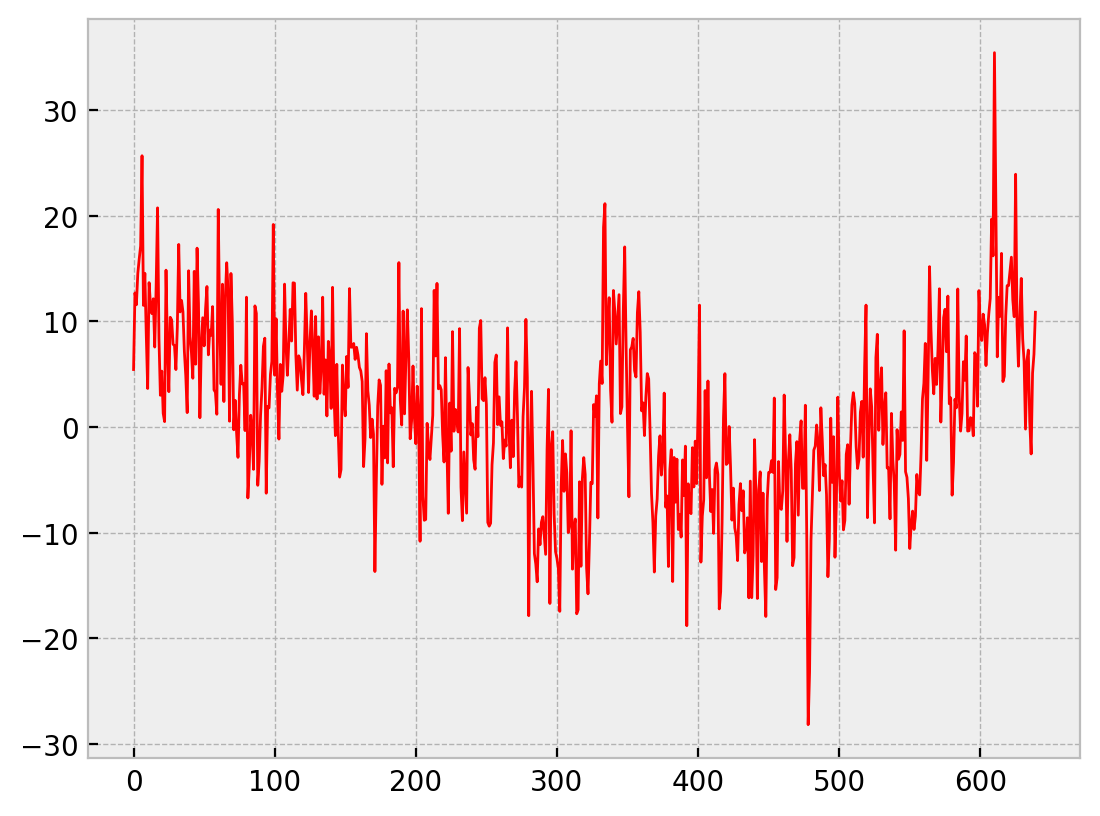

In [11]:
plt.plot(data, lw=1, c='red');

Specify a dashed line using `--`

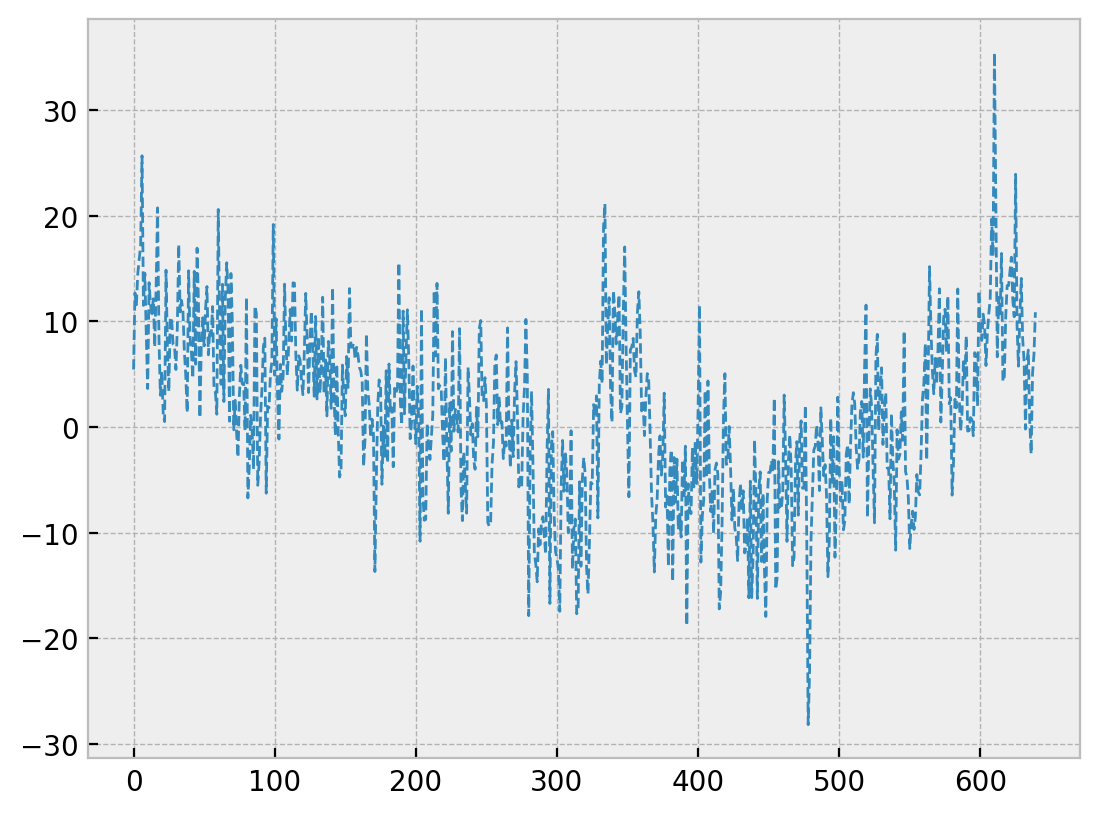

In [12]:
plt.plot(data, '--', lw=1);

Specify round markers and a dashed line using `o--`

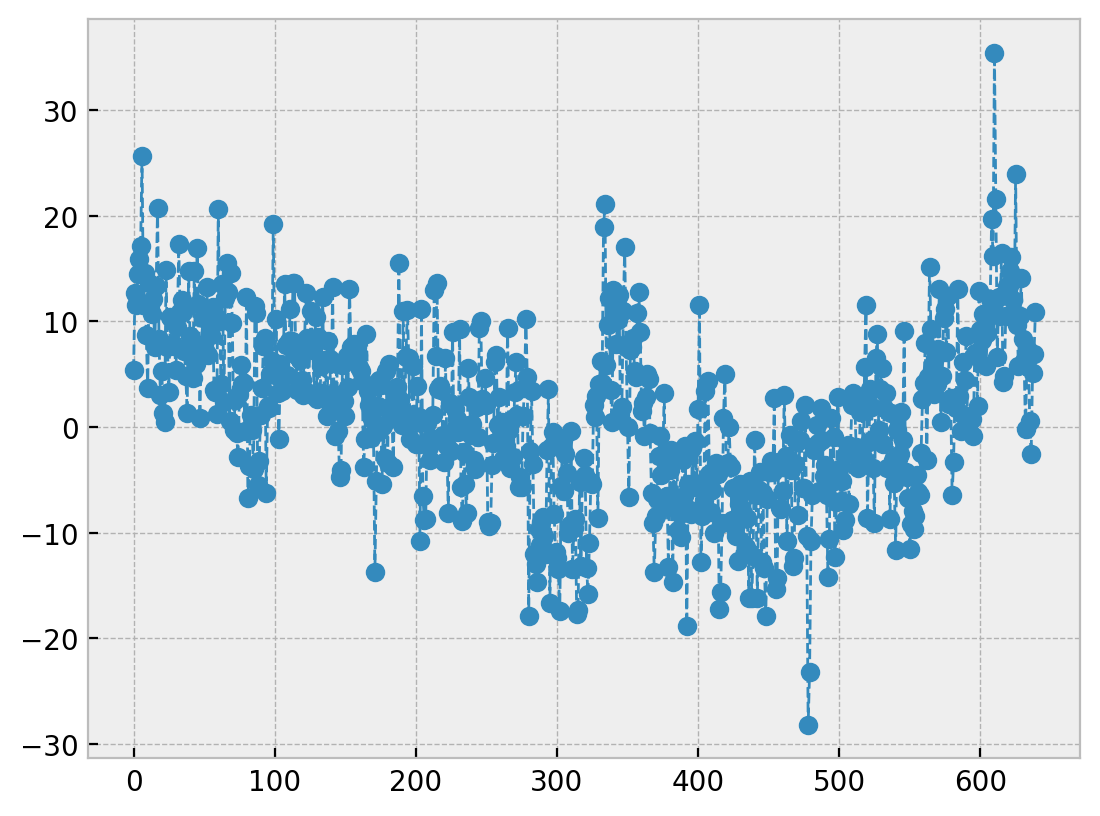

In [13]:
plt.plot(data, 'o--', lw=1);

Specify square markers and a solid line using `s-`

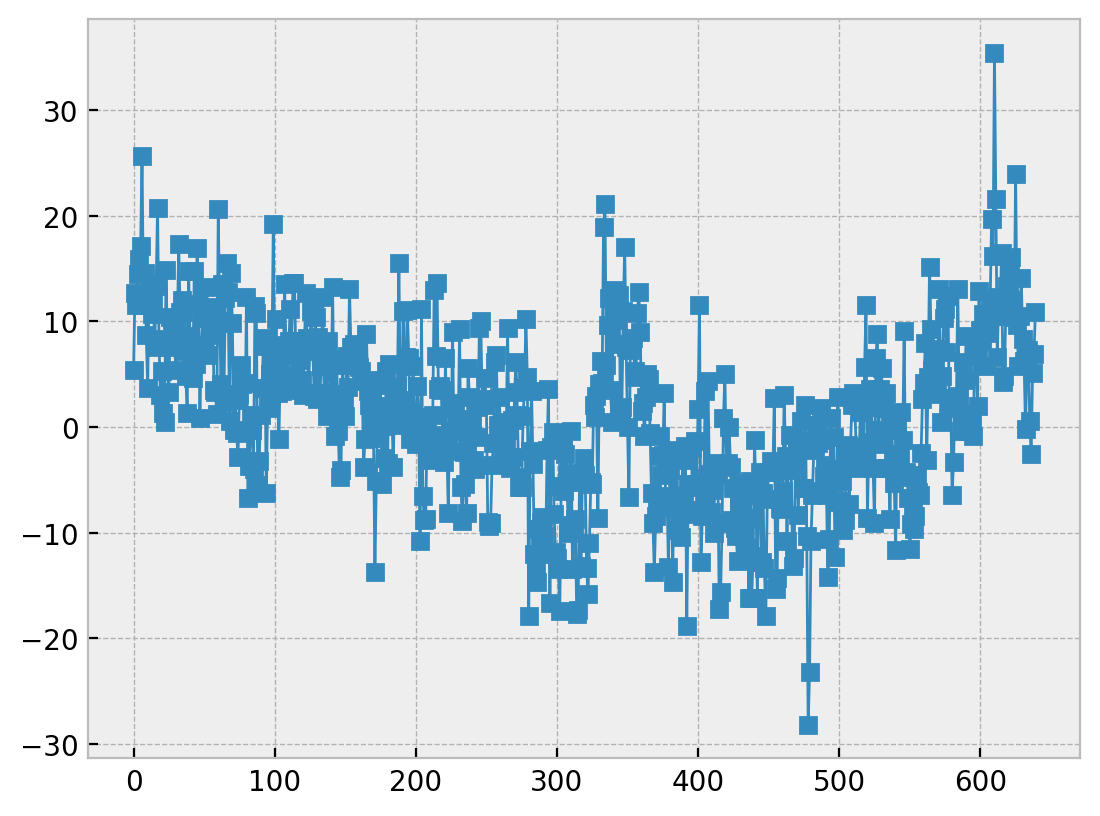

In [14]:
plt.plot(data, 's-', lw=1);

Speficy marker edge and face colors with `mec=` and `mfc=`

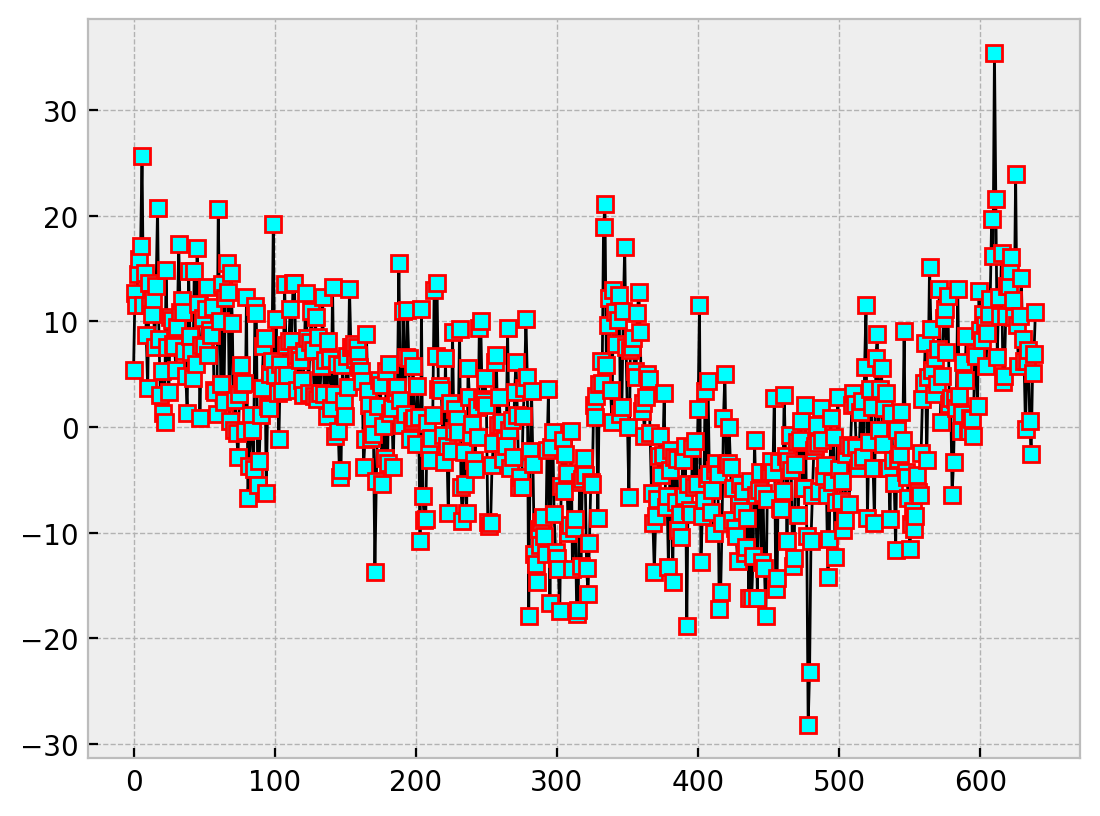

In [15]:
plt.plot(data, 's-', lw=1, c='black', mec='red', mfc=[0,1,1]);

Speficy non-filled markers with `mfc='none'`

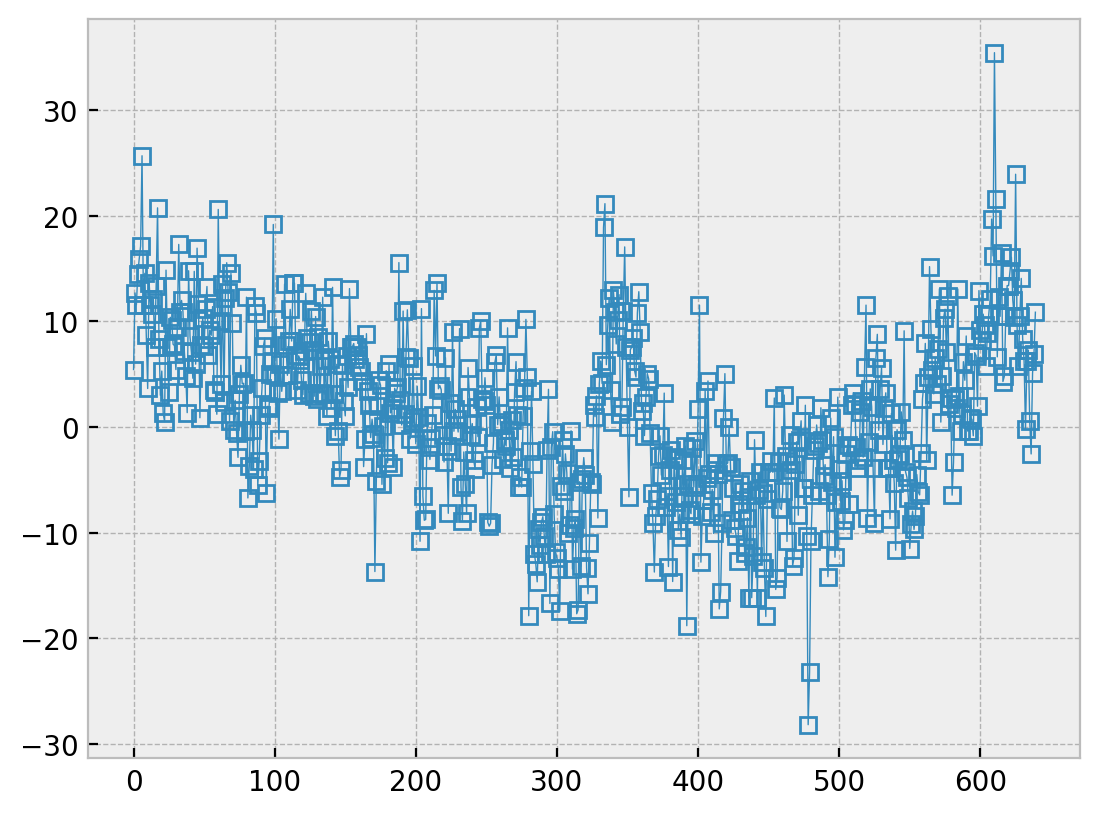

In [16]:
plt.plot(data, 's-', lw=0.5, mfc='none');

Speficy marker edge width with `mew=` and marker size with `ms=`

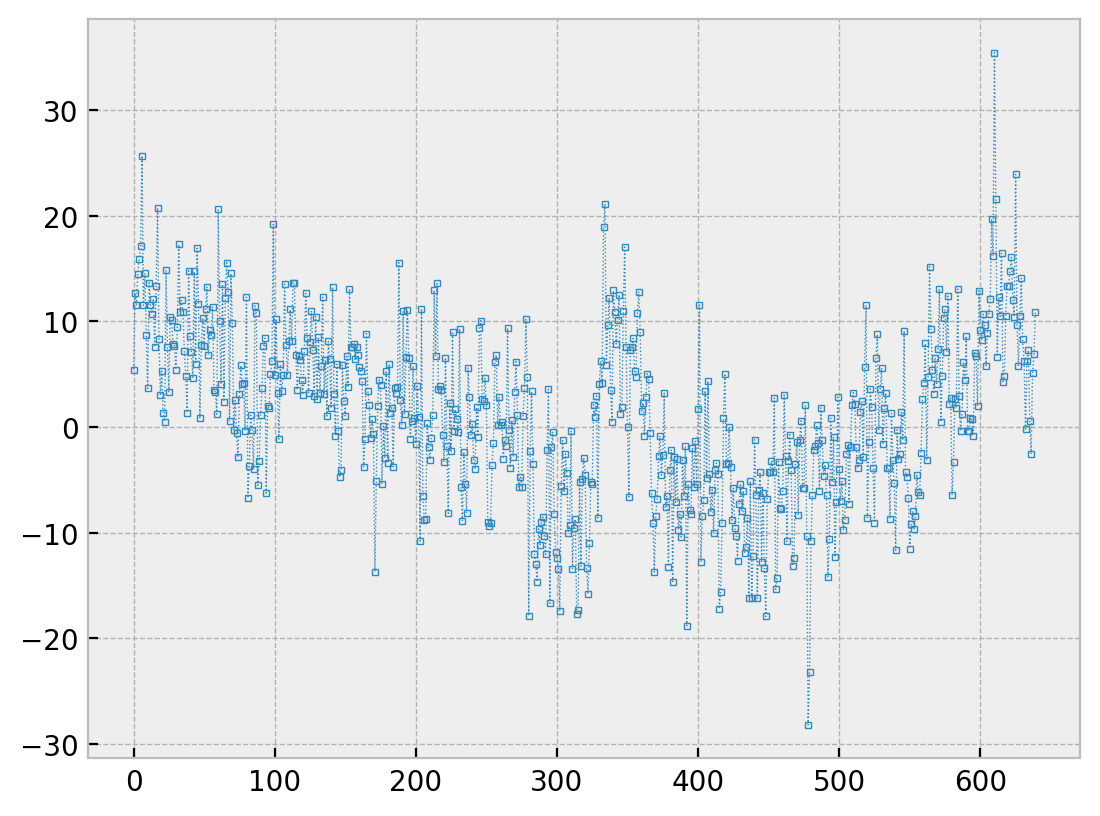

In [17]:
plt.plot(data, 's:', lw=0.5, mfc='none', mew=0.5, ms=2);

Set axes limits.

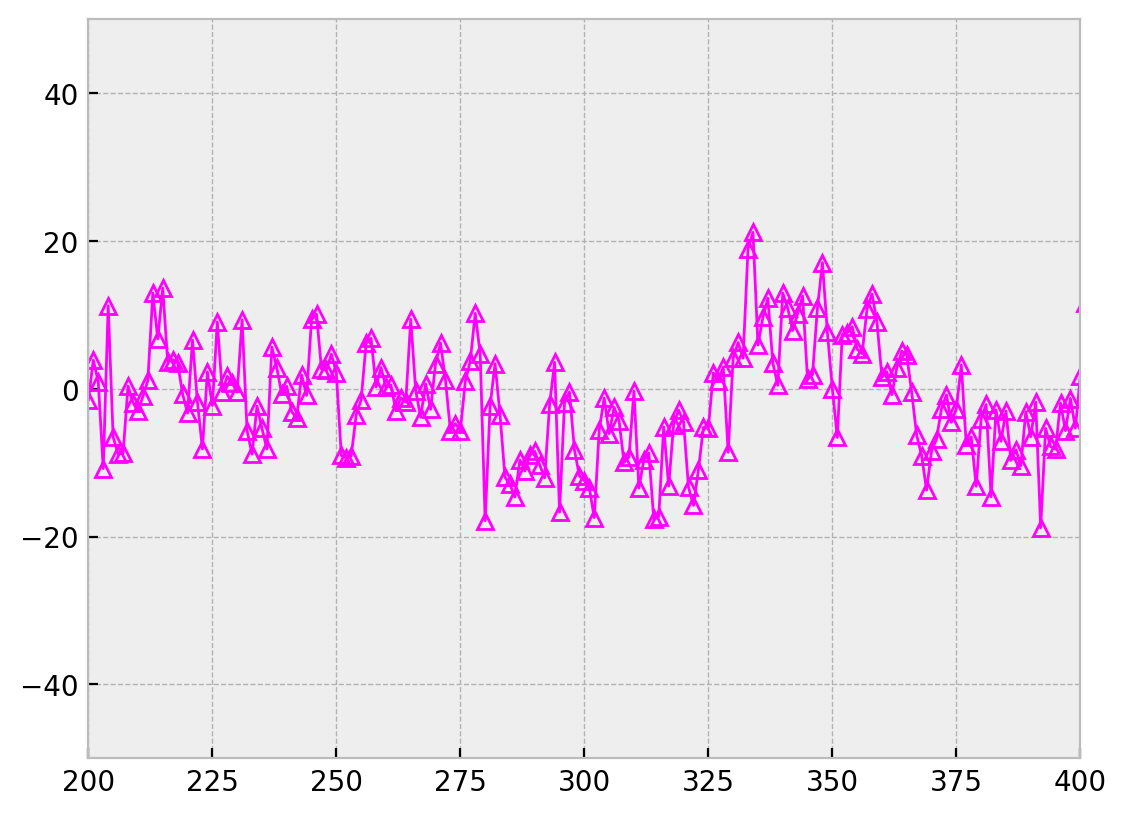

In [18]:
plt.plot(data, '^-', lw=1, c='magenta', mfc='none')
plt.xlim([200, 400])
plt.ylim([-50, 50]);

Without **axes labels (including units)** your plot is *NOT COMPLETE*!!!

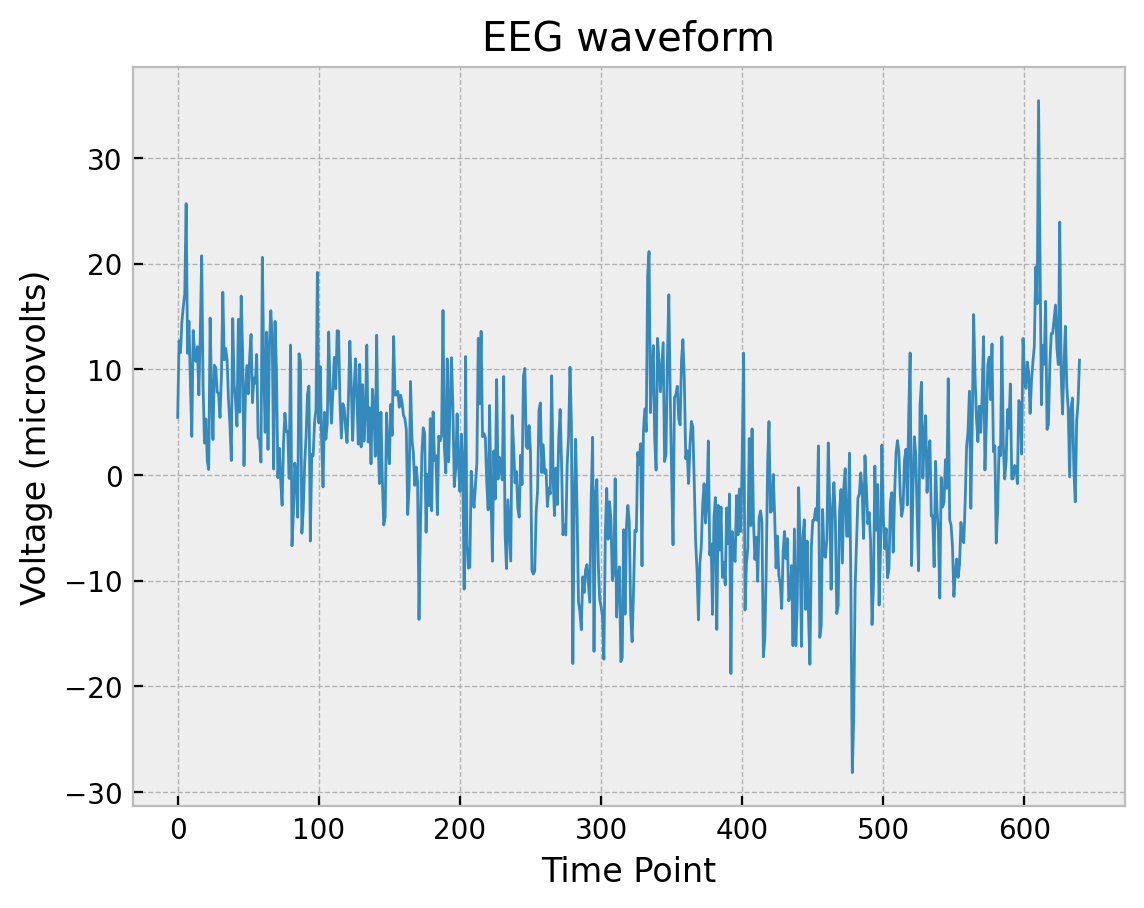

In [19]:
plt.plot(data, lw=1)
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)')
plt.title('EEG waveform');

Specify axes label and plot title font, size and color.

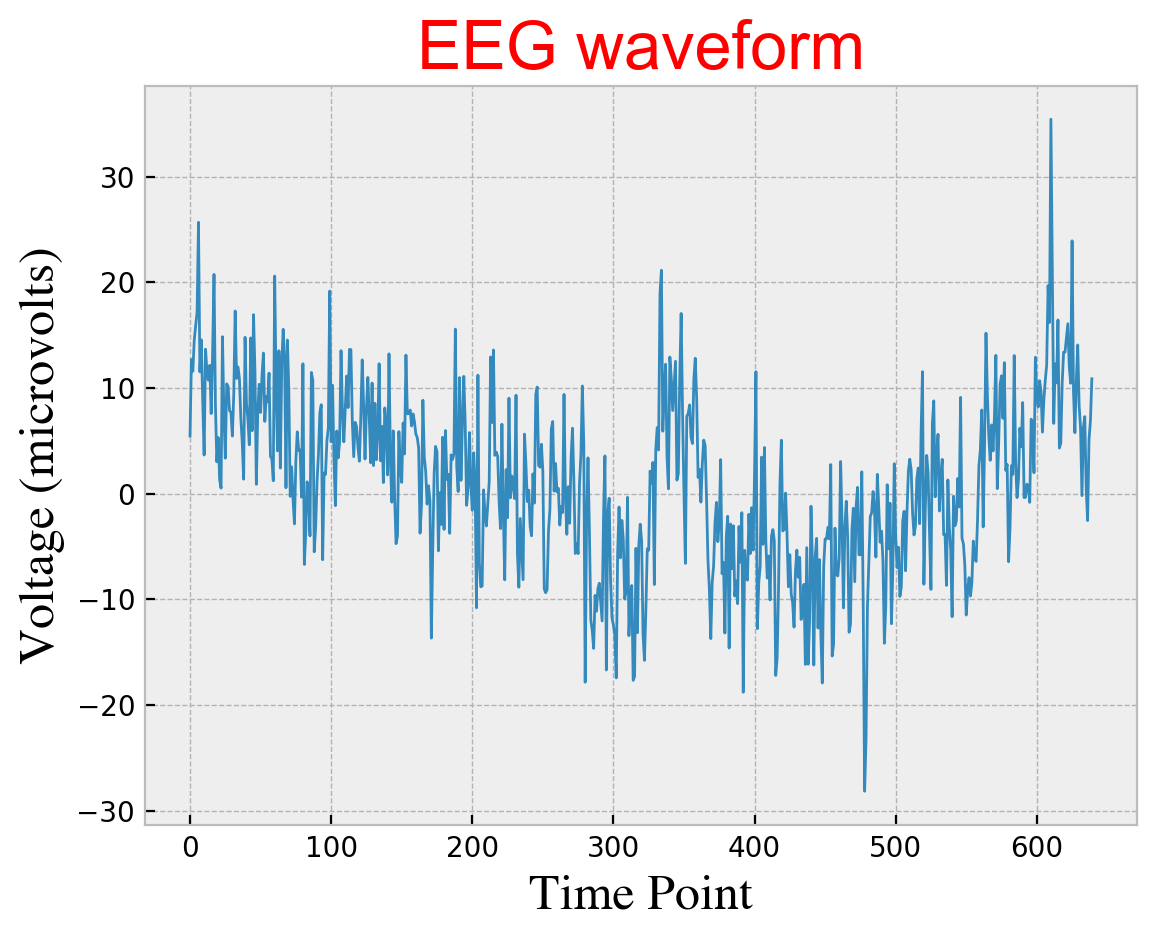

In [20]:
plt.plot(data, lw=1)
plt.xlabel('Time Point', font='Times', size=18)
plt.ylabel('Voltage (microvolts)', font='Times', size=18)
plt.title('EEG waveform', font='Arial', size=24, color='red');

Specify axes tick labels font, size and color.

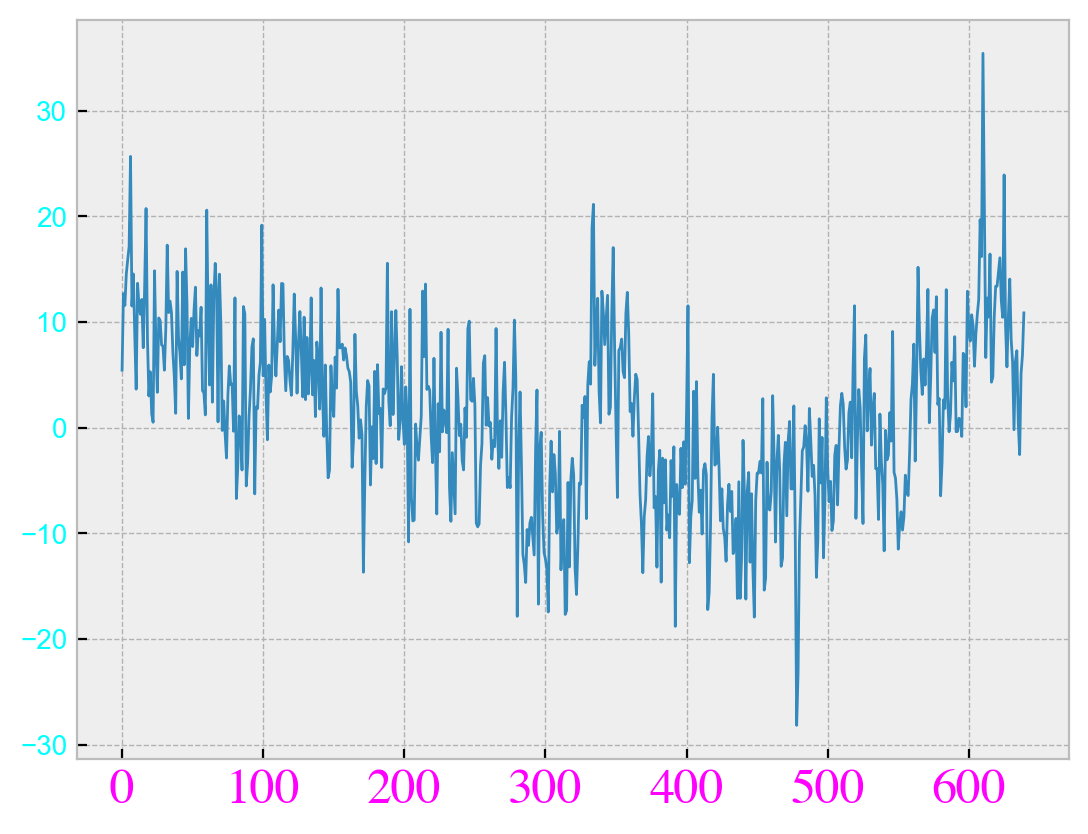

In [21]:
plt.plot(data, lw=1)
plt.xticks(font='Times', size=18, color=[1,0,1])
plt.yticks(font='Arial', size=10, color='cyan');

Instead of changing the title font size for each plot individually, let's set a new default size for all plots.

In [22]:
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['lines.linewidth'] = 1

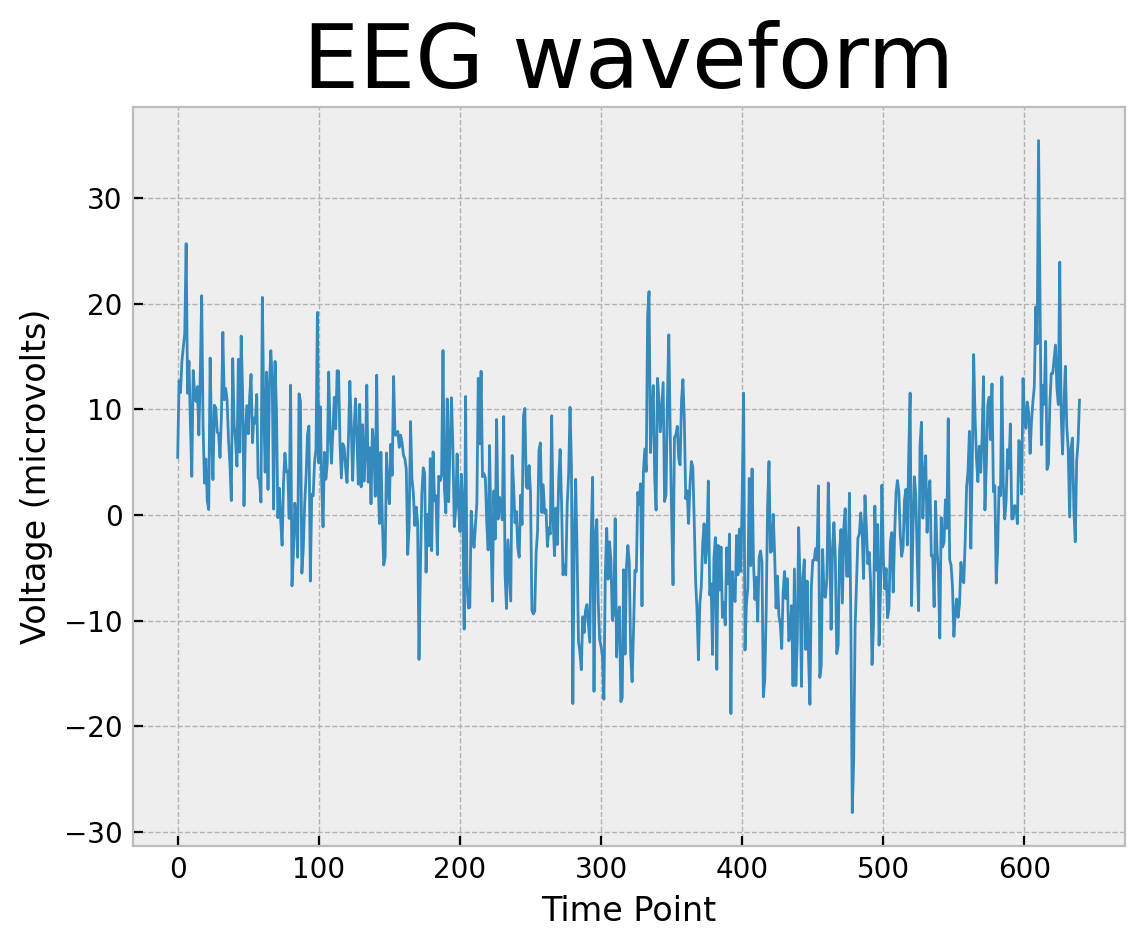

In [23]:
plt.plot(data)
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)')
plt.title('EEG waveform');

How did I know what rcParams key to edit?

Well, rcParams is just a dictionary...

In [24]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': '#bcbcbc',
          'axes.facecolor': '#eeeeee',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis':

Pretty much everything is customizable, just google it.

But you can probably get most of the way there with just a few commands that you would typically put near the beginning of your notebook such as:

In [25]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("bmh")
plt.rcParams['lines.linewidth'] = 1

Plot X vs. Y

In [26]:
N = len(data)

dt = 0.1  # sample interval in ms

# sample times (ms)
time = np.arange(N) * dt

time.shape, data.shape

((640,), (640,))

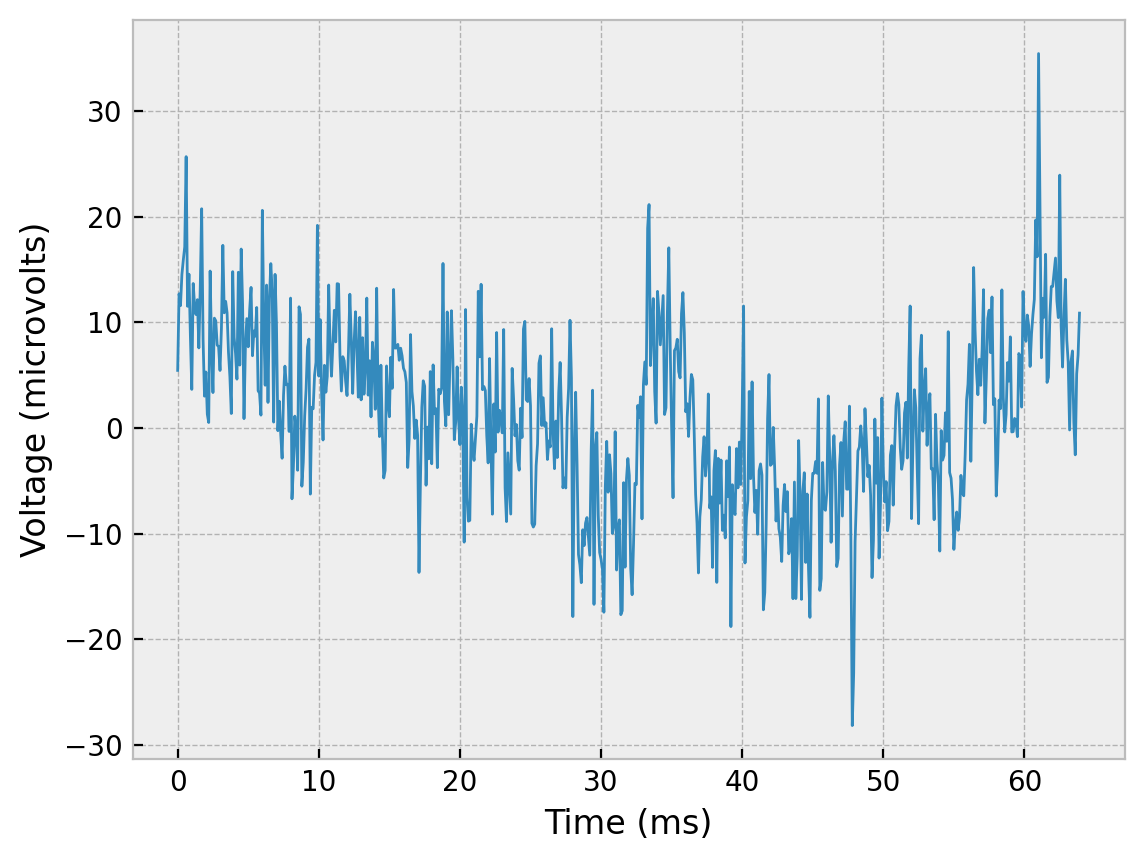

In [27]:
plt.plot(time, data)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (microvolts)');

Plot the EEGs from channel 1 for the first three trials all toegther on the same axes.

<img src="images/EEGs-channel1.png" width="50%">

In [28]:
# data = channel 1, first three trials

data = EEGs[1,:,:3]

data.shape

(640, 3)

`data` now has the format `data[time, trial]`

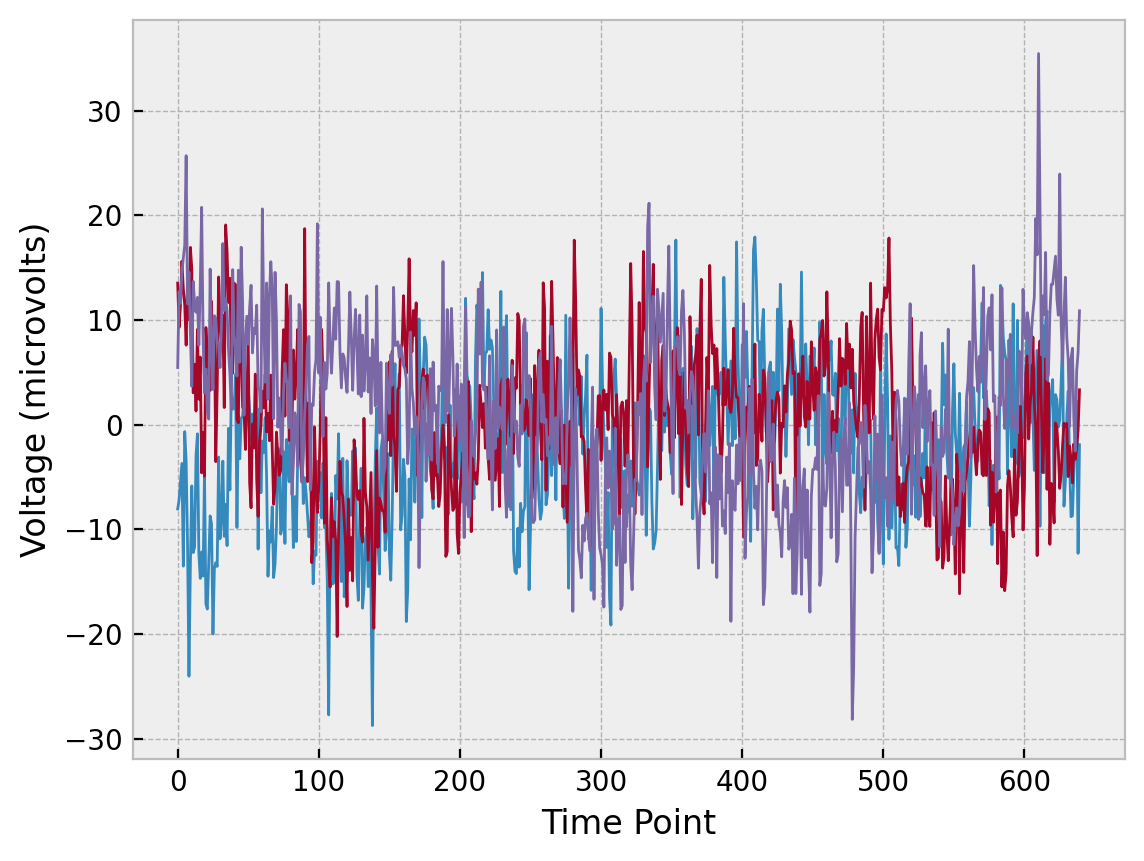

In [29]:
plt.plot(data[:,0])  # all time pts, trial 0
plt.plot(data[:,1])  # all time pts, trial 1
plt.plot(data[:,2])  # all time pts, trial 2
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)');

Add a legend and label each trace.

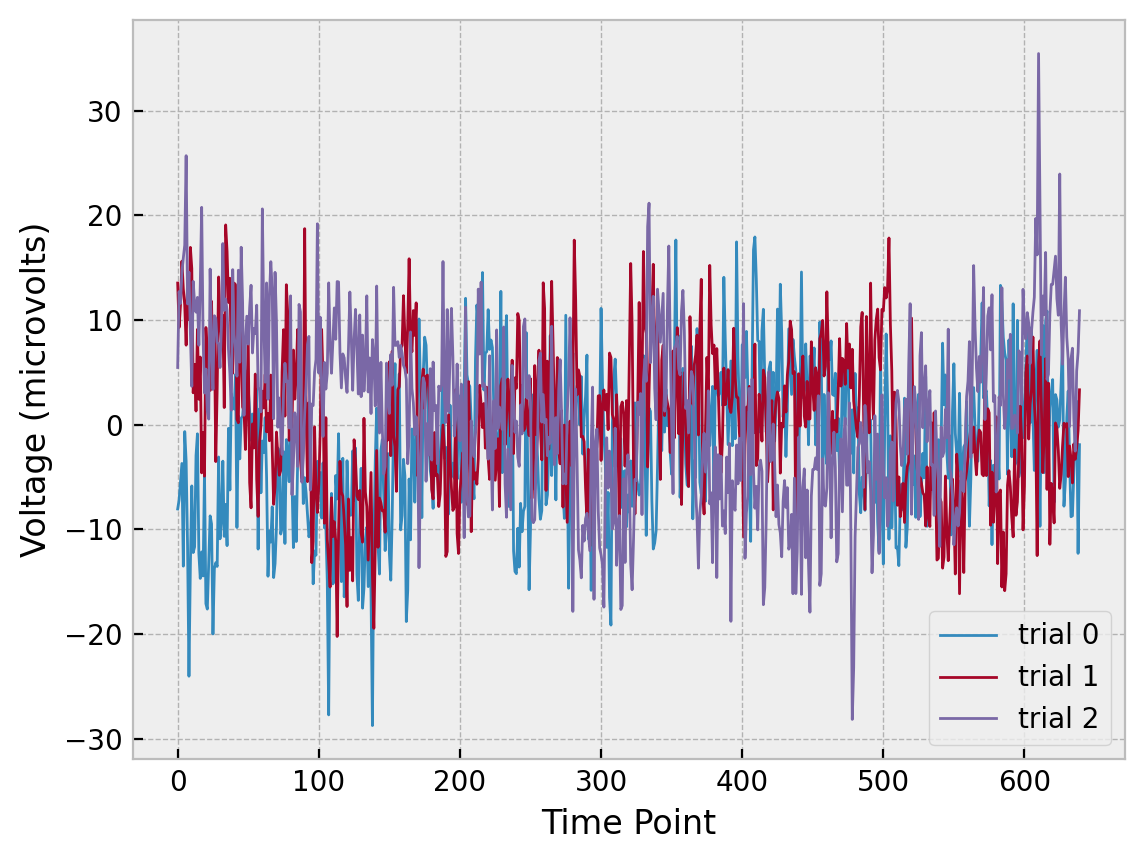

In [30]:
plt.plot(data[:,0], label="trial 0")
plt.plot(data[:,1], label="trial 1")
plt.plot(data[:,2], label="trial 2")
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)')
plt.legend();

`for` loops are good for this sort of thing...

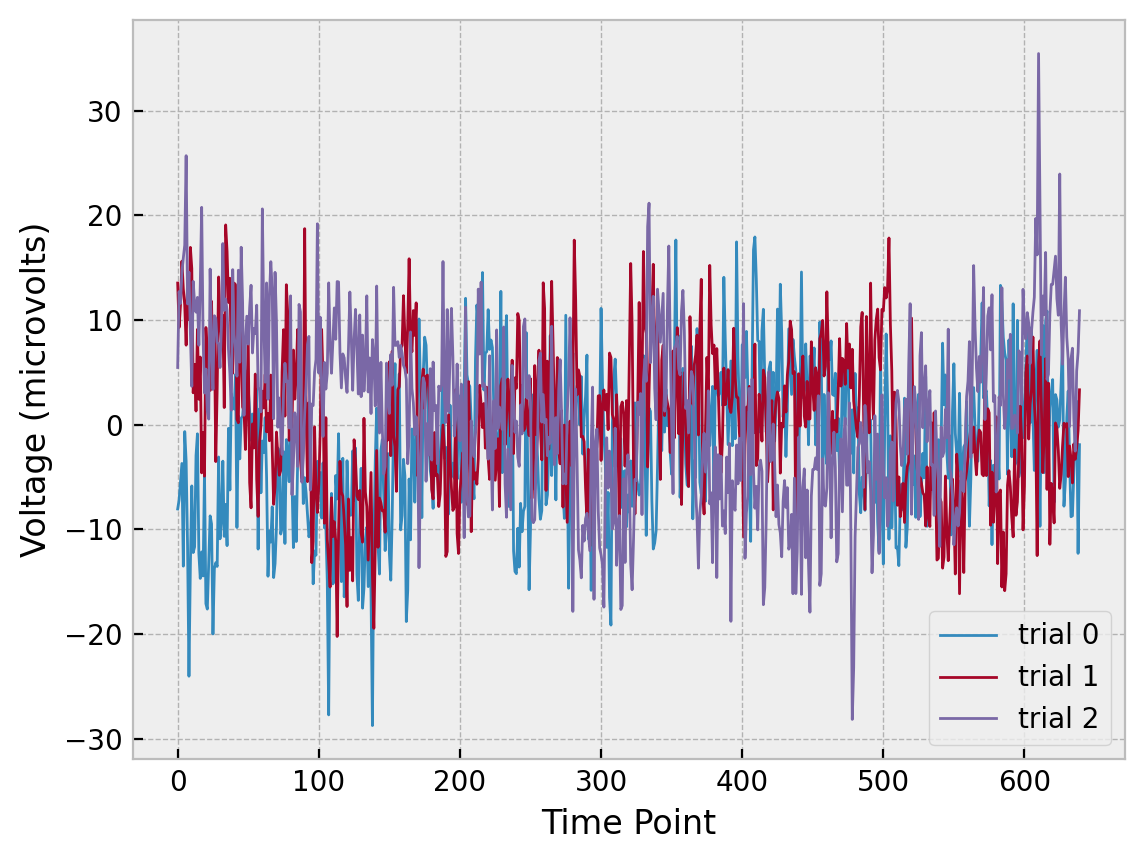

In [31]:
for trial in range(3):
    plt.plot(data[:,trial], label=f"trial {trial}")
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)')
plt.legend();

Matplotlib will treat each column of a matrix as a separate plot.

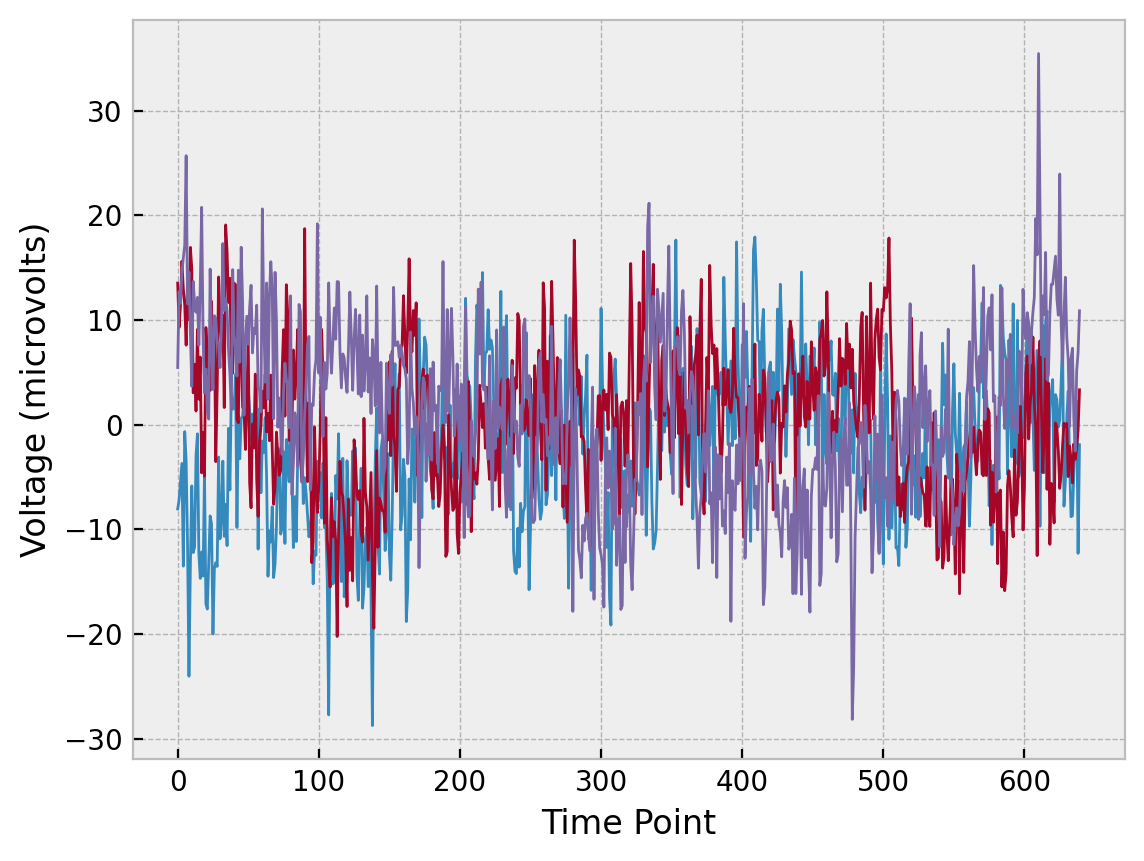

In [32]:
plt.plot(data)
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)');

Let's plot EEGs for channel 1 across all trials overlaid with the trial average.

<img src="images/EEGs-channel1.png" width="50%">

In [33]:
# data = channel 1, all trials

data = EEGs[1,:,:]

data.shape

(640, 99)

In [34]:
# avg = channel 1 trial average

avg = data.mean(axis=1)

avg.shape

(640,)

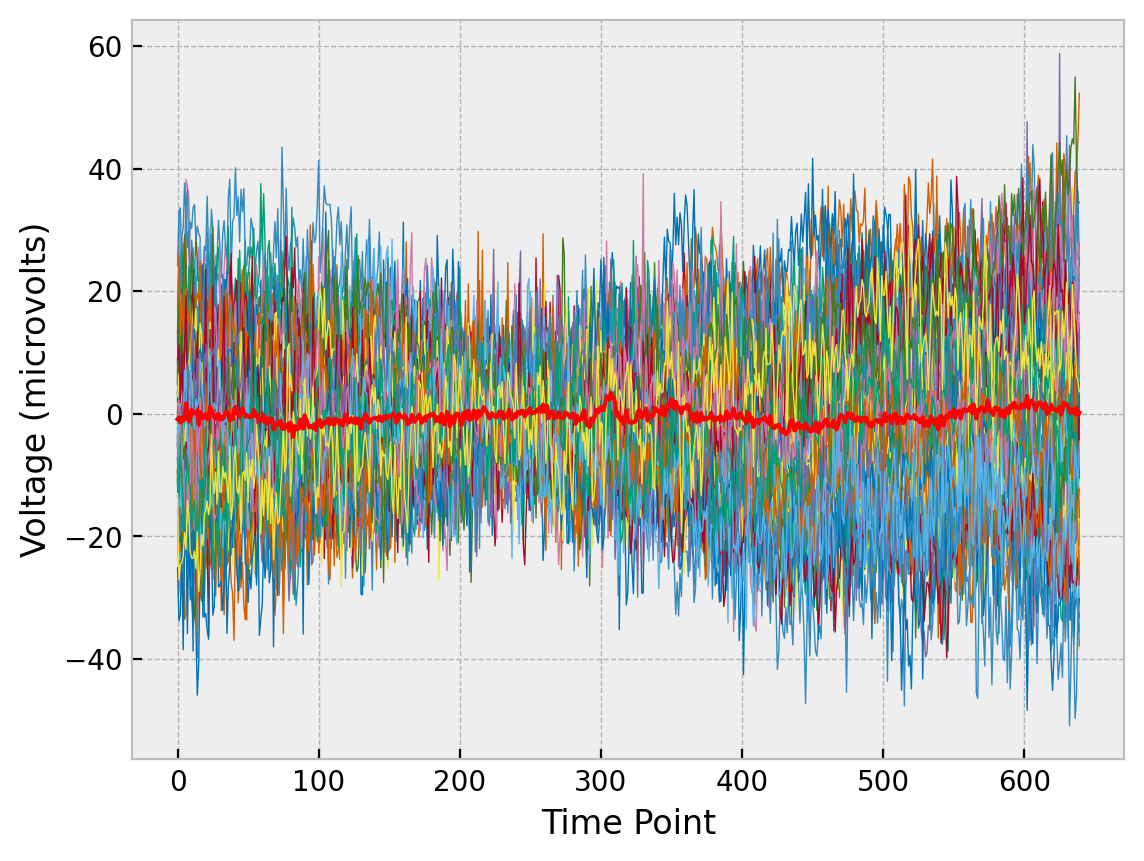

In [35]:
plt.plot(data, lw=0.5)
plt.plot(avg, lw=1.5, c='red')
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)');

Let's see the trial average alone.

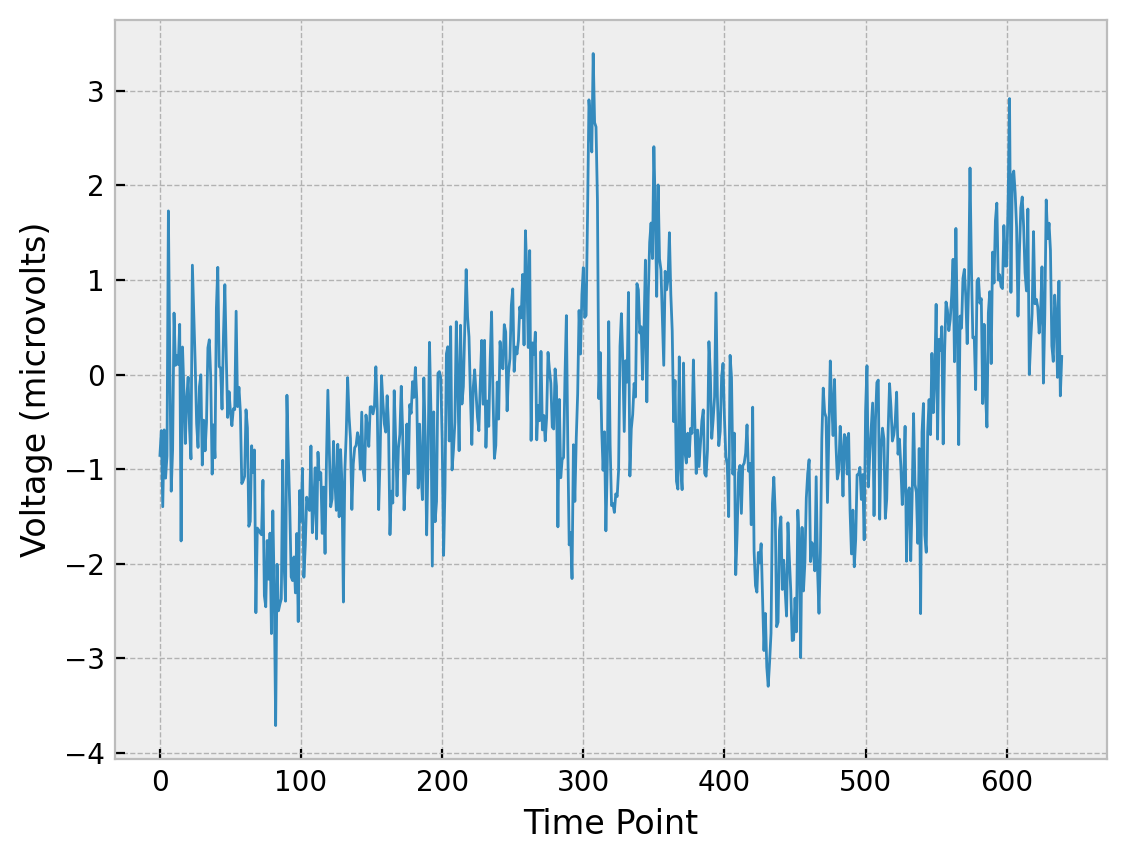

In [36]:
plt.plot(avg)
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)');

Let's change the figure size.

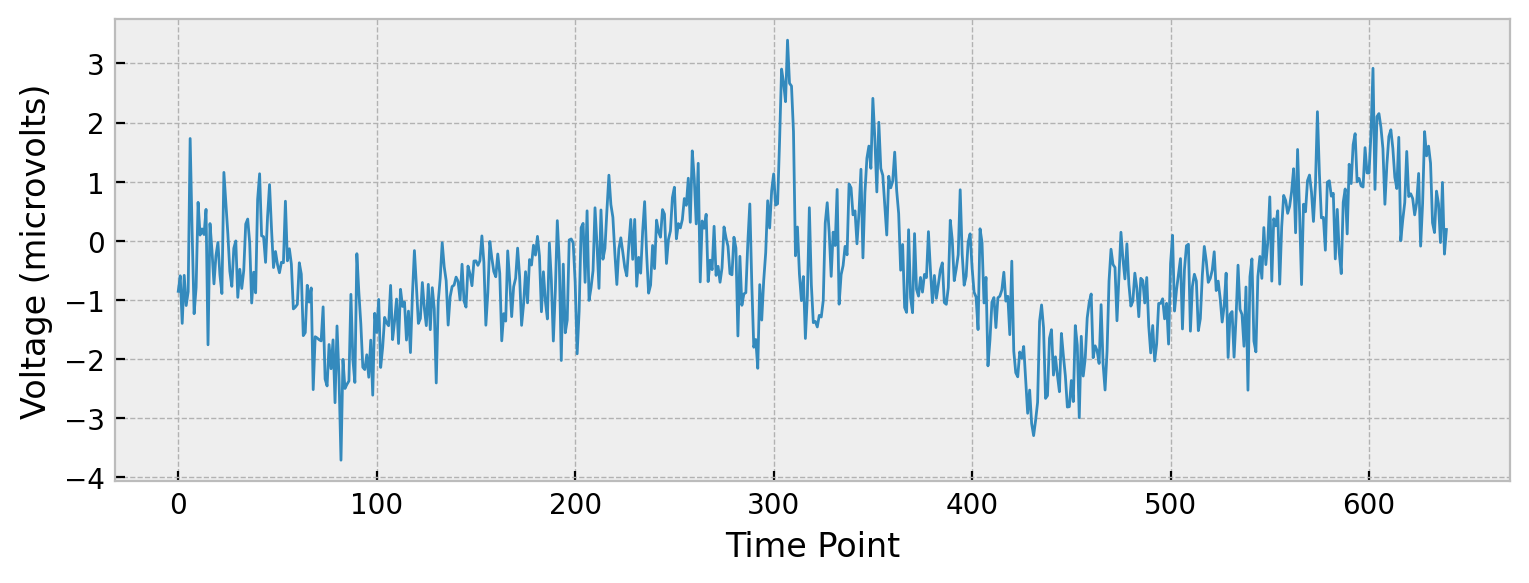

In [37]:
plt.figure(figsize=[9,3])
plt.plot(avg)
plt.xlabel('Time Point')
plt.ylabel('Voltage (microvolts)');

# Exercise

Get the average EEG across trials for each channel.

In [38]:
# # EEGs[channel, time, trial]
# EEGs = np.load("data/EEGs.npy")

# avgs = EEGs.mean(axis=???)

# avgs.shape

# Exercise Key

Get the average EEG across trials for each channel.

In [39]:
# EEGs[channel, time, trial]
EEGs = np.load("data/EEGs.npy")

avgs = EEGs.mean(axis=2)

# 64 channels x 640 time pts
avgs.shape

(64, 640)

Let's plot the trial averages for channels 0, 1, 2, and 3 in a 2x2 grid.

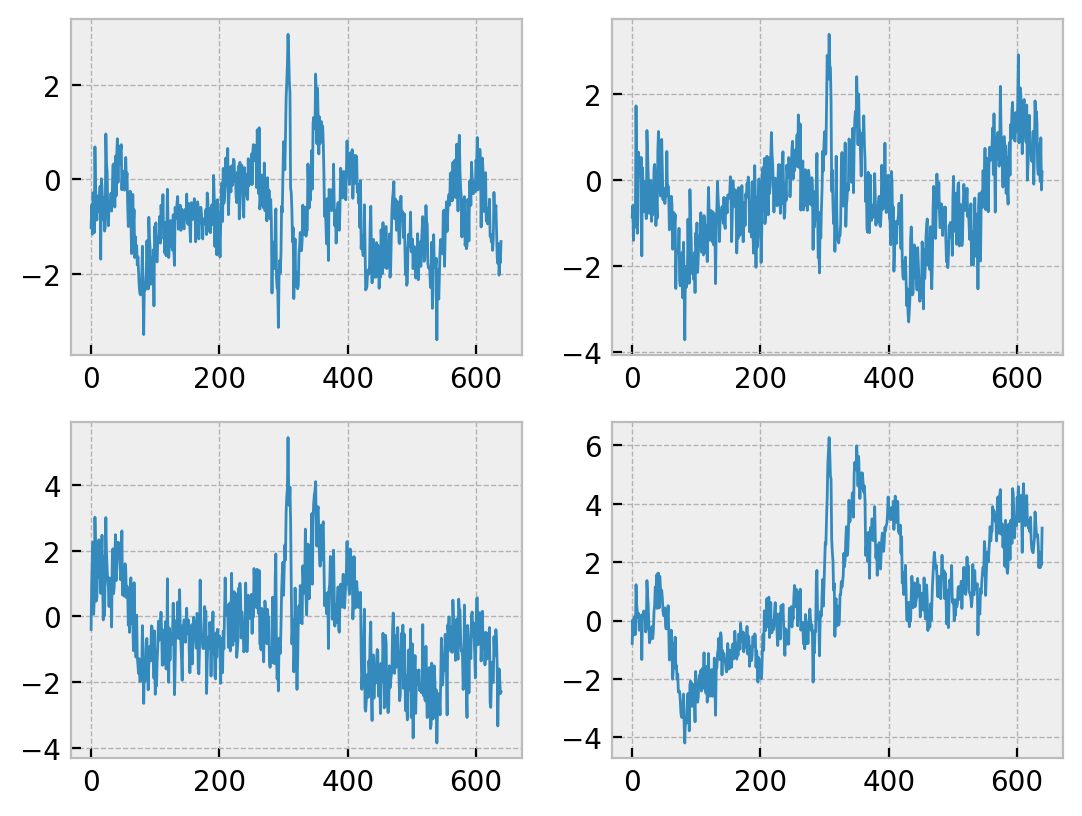

In [40]:
plt.subplot(2, 2, 1)  # !!! 1-based indexing here
plt.plot(avgs[0,:])   # Last `:` slice is assumed if omitted
plt.subplot(2, 2, 2)
plt.plot(avgs[1])
plt.subplot(2, 2, 3)
plt.plot(avgs[2])
plt.subplot(2, 2, 4)
plt.plot(avgs[3]);

`for` loops are good for this sort of thing...

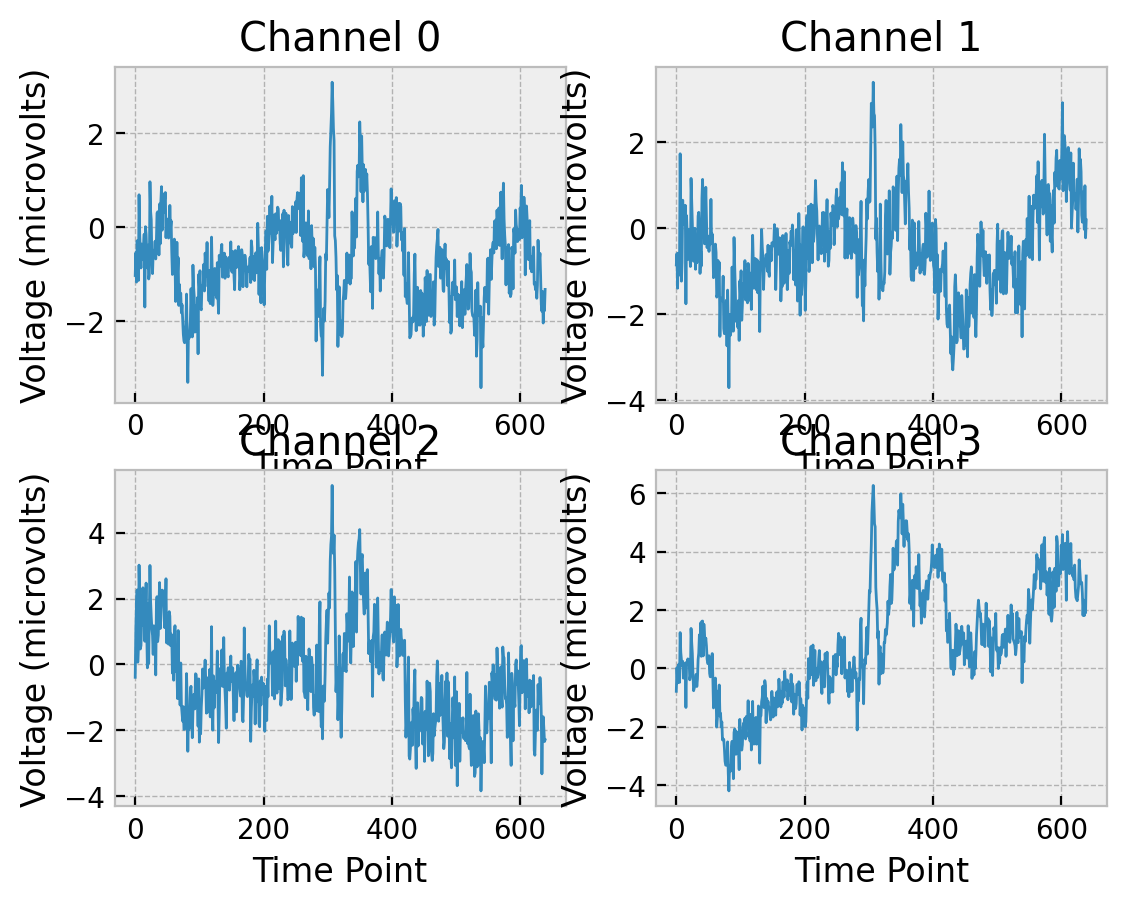

In [41]:
for i in range(4):
    plt.subplot(2, 2, i+1)  # i+1 for 1-based index
    plt.plot(avgs[i])
    plt.xlabel('Time Point')
    plt.ylabel('Voltage (microvolts)')
    plt.title(f'Channel {i}')

use `plt.tight_layout()` to ensure labels do not overlap.

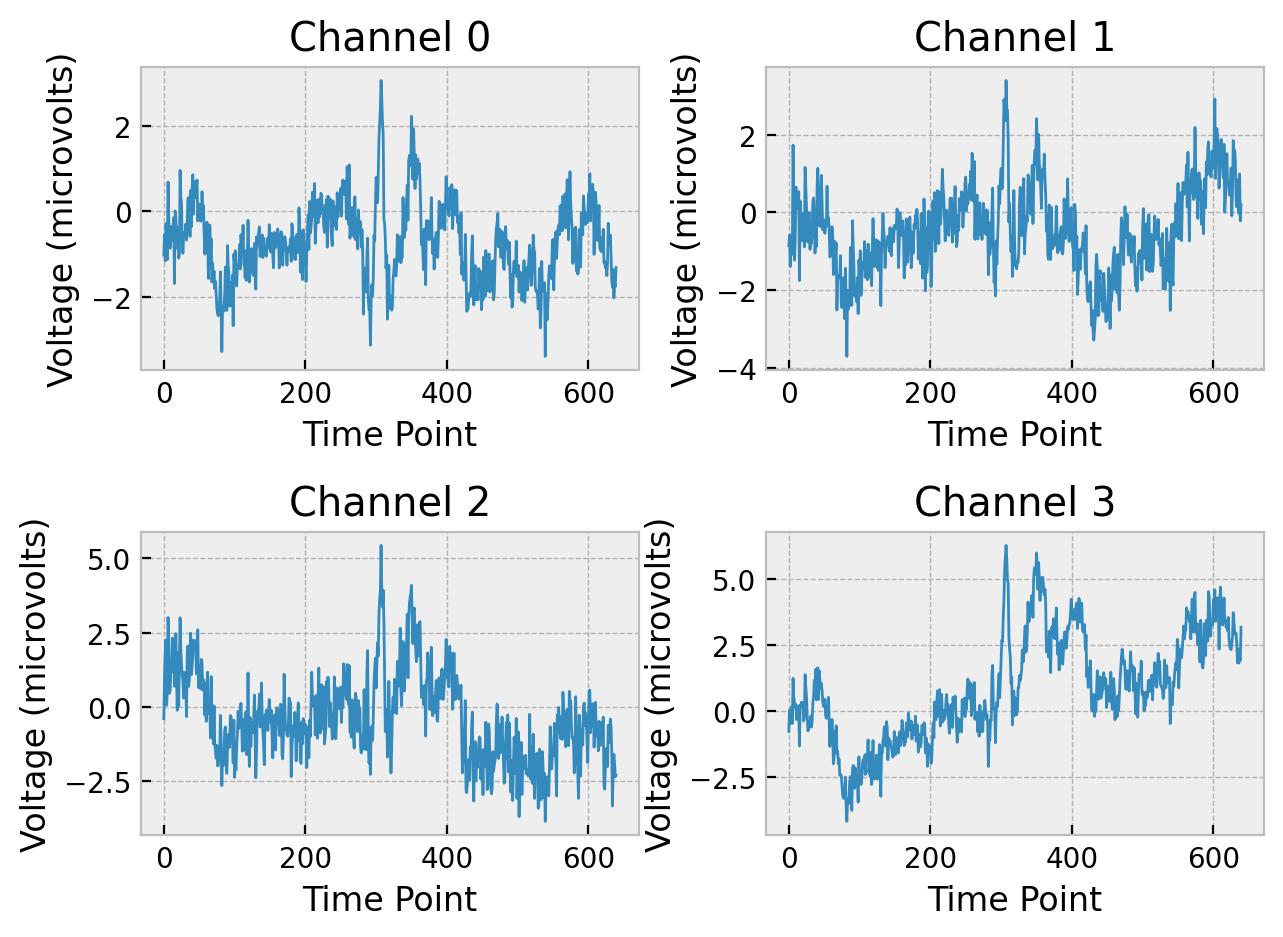

In [42]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(avgs[i])
    plt.xlabel('Time Point')
    plt.ylabel('Voltage (microvolts)')
    plt.title(f'Channel {i}')
plt.tight_layout();

### A **Quick Start** guide for **histograms** in Matplotlib

**Learning goals**
- You will be able to plot 1-D data as a histogram.
- You will be able to style your histograms.
- You will be able to get the histogram bin counts and bin edges as numerical arrays.

Let's consider the weight (g) of mice in both a control and test group (35 mice per group).

In [43]:
# See np.loadtxt & np.savetxt
# Filepath is relative to this notebook
control_weights, test_weights = np.loadtxt('data/mouse_weights.txt')

control_weights.shape, test_weights.shape

((35,), (35,))

How might you plot the weights for the control group?

You will often represent one-dimensional data as a **histogram**.

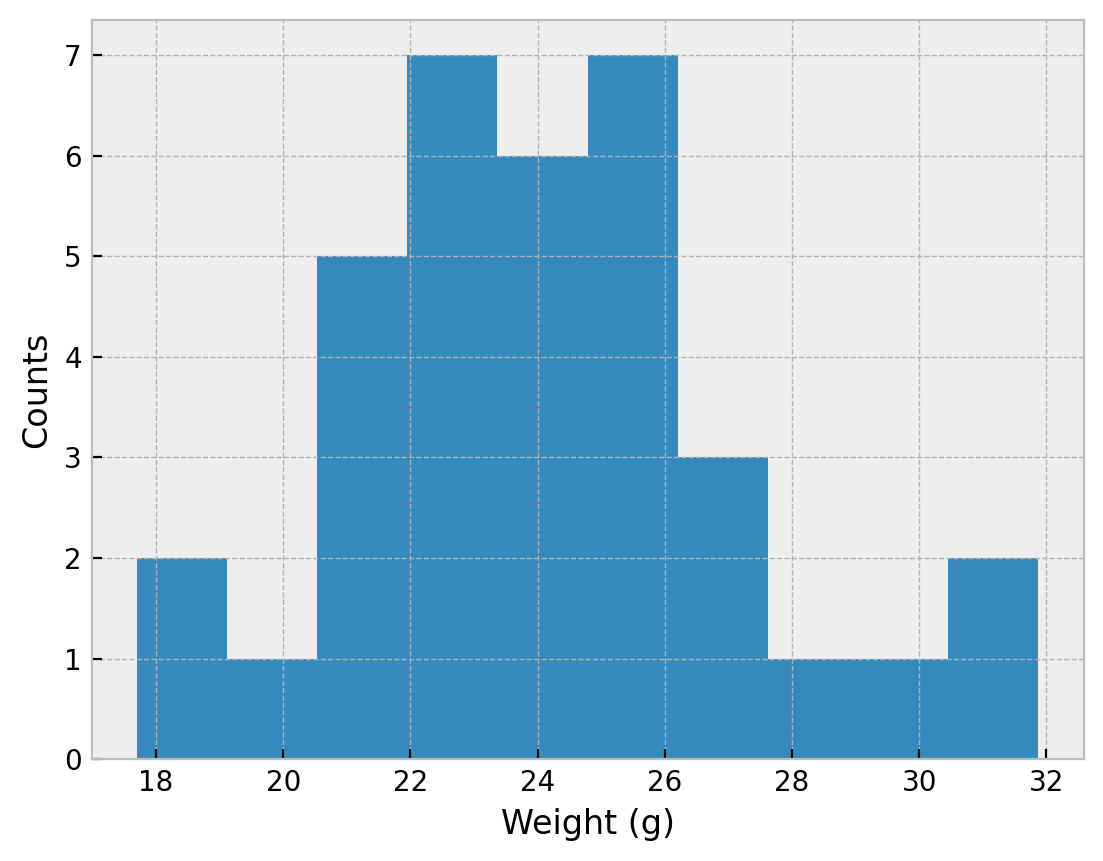

In [44]:
plt.hist(control_weights)
plt.xlabel('Weight (g)')
plt.ylabel('Counts');

Specify the number of bins (20 in this case).

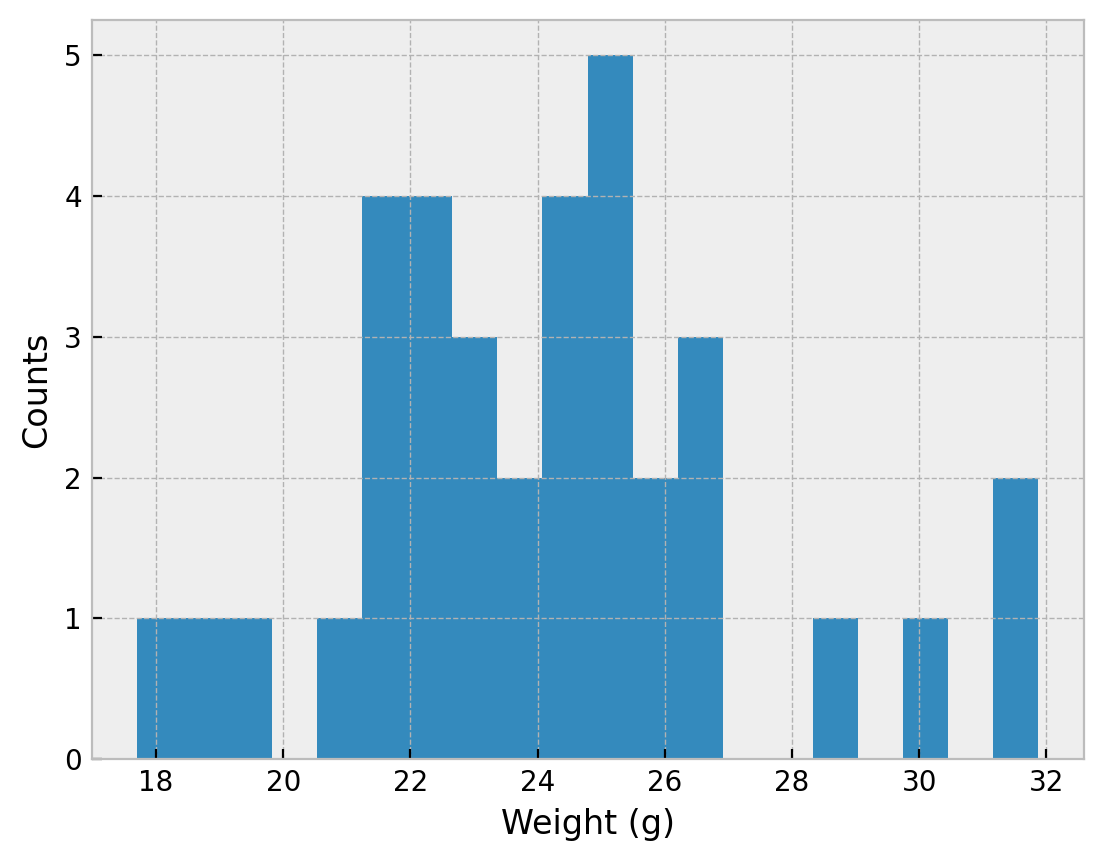

In [45]:
plt.hist(control_weights, 20)
plt.xlabel('Weight (g)')
plt.ylabel('Counts');

Specify the bin edges from 16-32 in steps of 2.

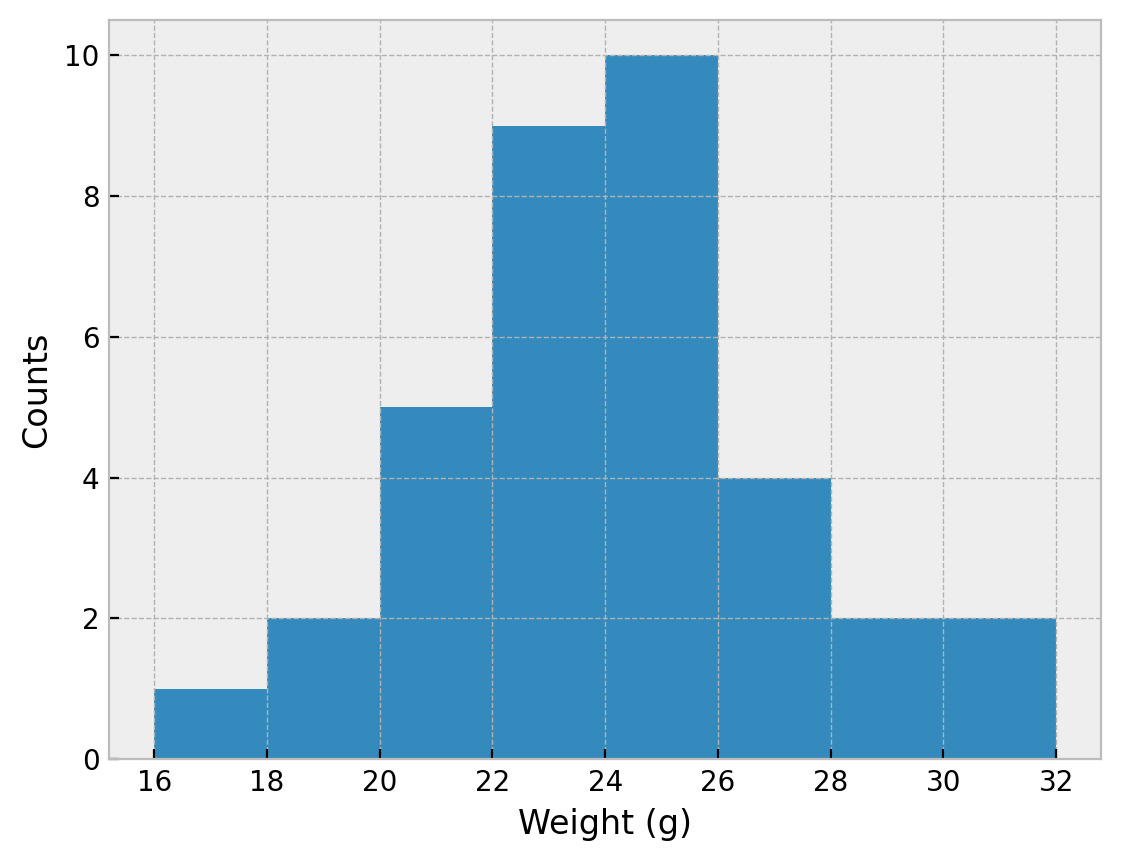

In [46]:
bin_edges = np.arange(16, 33, 2)
plt.hist(control_weights, bin_edges)
plt.xlabel('Weight (g)')
plt.ylabel('Counts');

Specify face color, edge color, and edge line width...

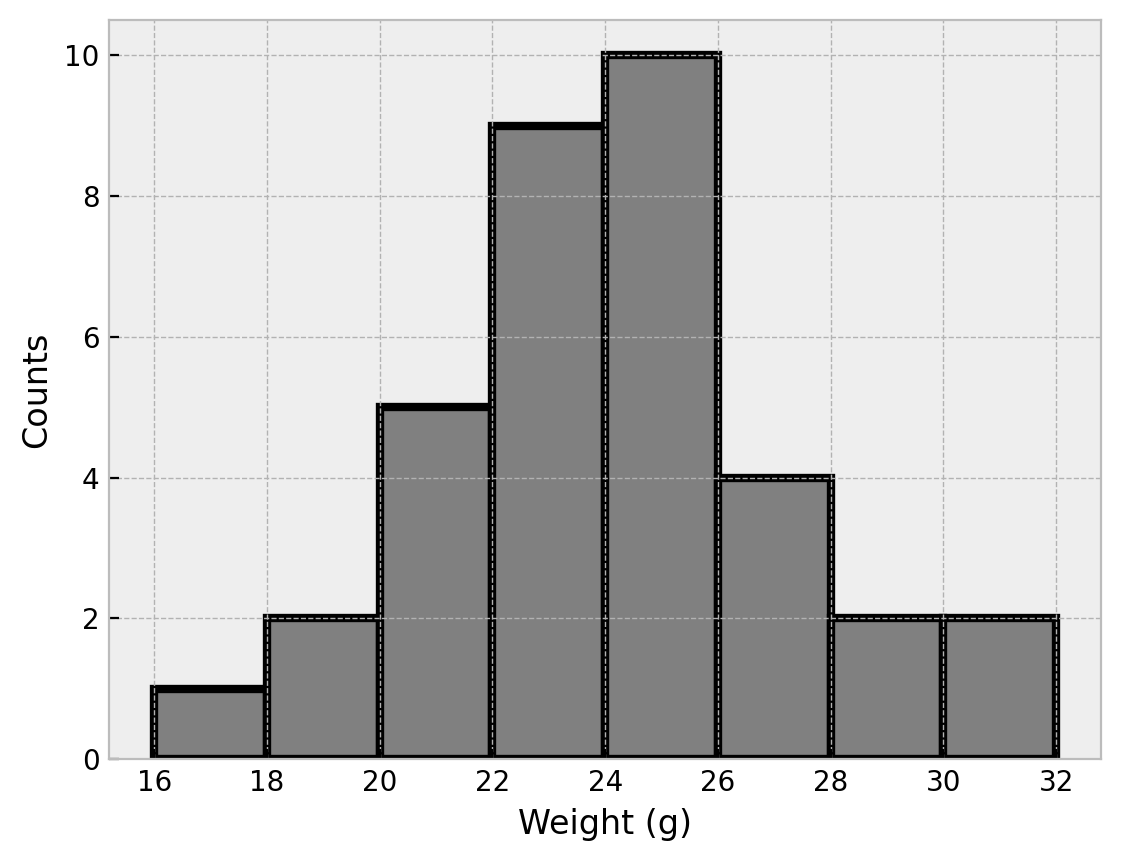

In [53]:
bin_edges = np.arange(16, 33, 2)
plt.hist(control_weights, bin_edges, facecolor='gray', edgecolor='black', linewidth=3)
plt.xlabel('Weight (g)')
plt.ylabel('Counts');

Sepcify histogram style with `histtype=`

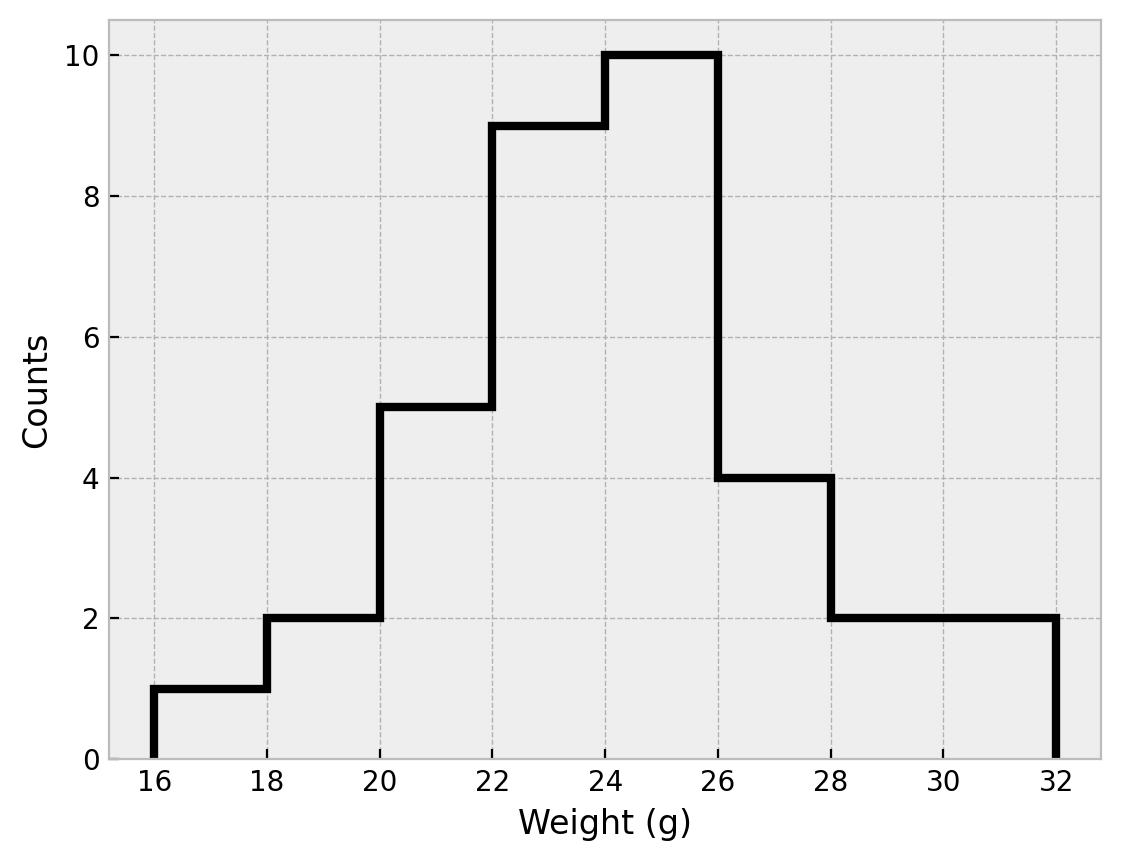

In [54]:
bin_edges = np.arange(16, 33, 2)
plt.hist(control_weights, bin_edges, edgecolor='black', linewidth=3, histtype='step')
plt.xlabel('Weight (g)')
plt.ylabel('Counts');

Plot histograms for both the control and test groups on the same axes.

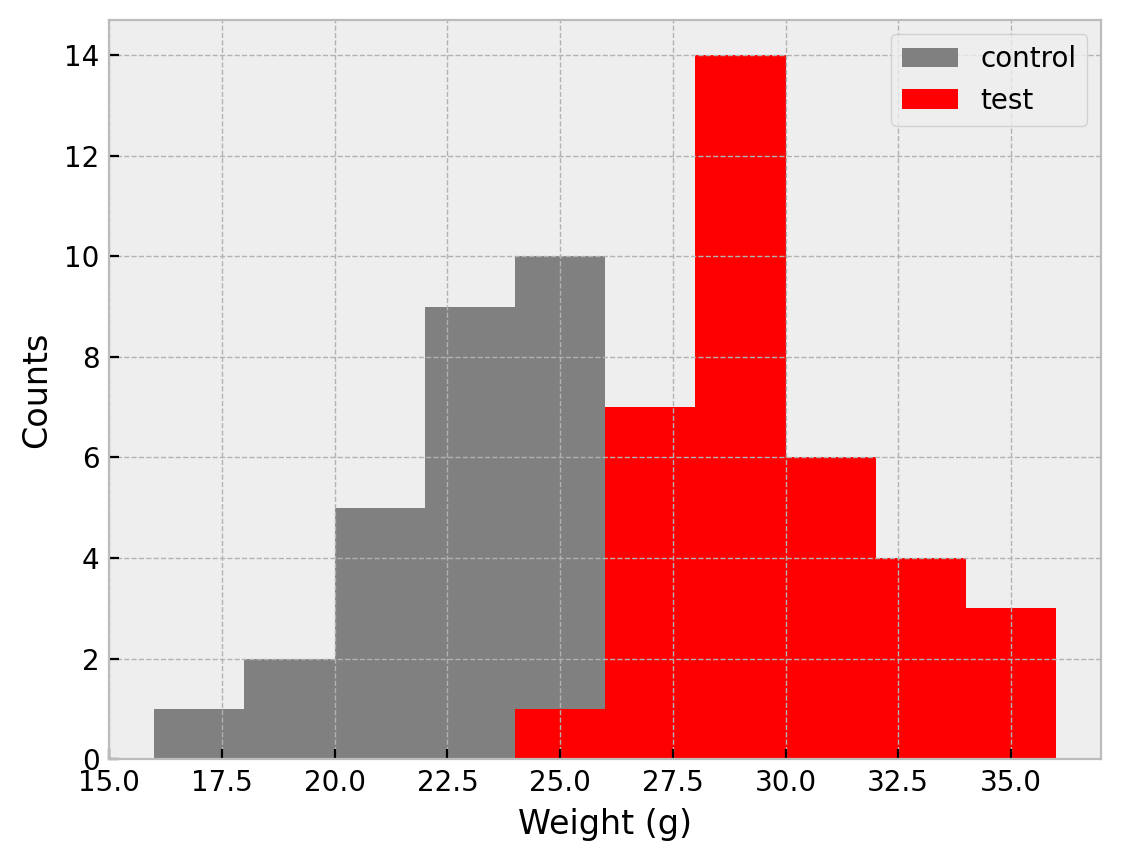

In [55]:
bin_edges = np.arange(16, 38, 2)
plt.hist(control_weights, bin_edges, facecolor='gray', label='control')
plt.hist(test_weights, bin_edges, facecolor='red', label='test')
plt.xlabel('Weight (g)')
plt.ylabel('Counts')
plt.legend();

Specify opacity using `alpha=`

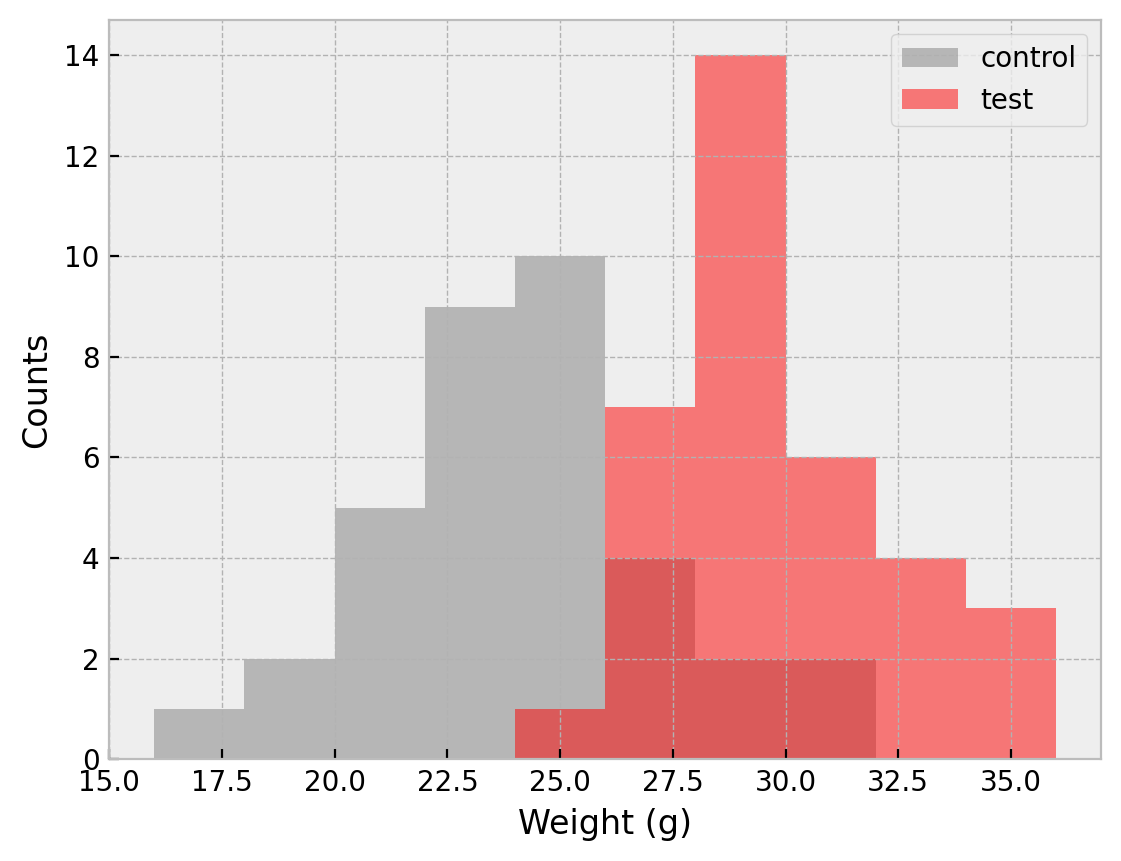

In [56]:
bin_edges = np.arange(16, 38, 2)
plt.hist(control_weights, bin_edges, facecolor='gray', alpha=0.5, label='control')
plt.hist(test_weights, bin_edges, facecolor='red', alpha=0.5, label='test')
plt.xlabel('Weight (g)')
plt.ylabel('Counts')
plt.legend();